# Descriptive Statistic / Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [8]:
ds = pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [22]:
#subsets
background = ['PB030: PERSONAL ID', 'PB020: COUNTRY','PB010: YEAR OF THE SURVEY','PB140: YEAR OF BIRTH','PB150: SEX','PB190: MARITAL STATUS','PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']

education = ['PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED']

work = ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK', 'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION']

health = ['PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

job= ['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
      "PY090G++: SOCIAL BENEFITS"]
jobdiff=['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']


bneeds= ['PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home']


sat =['PW010: OVERALL LIFE SATISFACTION', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW180: HELP FROM OTHERS', 'PW190: TRUST IN OTHERS',
       'PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS',
       'PW210: SATISFACTION WITH LIVING ENVIRONMENT',
       'PW220: PHYSICAL SECURITY']

subsets= [background,education,work,health,job,bneeds, sat]

# 1. Data Exploration

## 2.1. Descriptive Statistics

In [9]:
ds.head()

,PB030: PERSONAL ID,PB020: COUNTRY,PB010: YEAR OF THE SURVEY,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,...,PW130: TRUST IN THE POLITICAL SYSTEM,PW140: TRUST IN THE LEGAL SYSTEM,PW150: TRUST IN THE POLICE,PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS,PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH),PW180: HELP FROM OTHERS,PW190: TRUST IN OTHERS,PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS,PW210: SATISFACTION WITH LIVING ENVIRONMENT,PW220: PHYSICAL SECURITY
0,35601,DE,2013,1977,1,2.0,3,0,2,3.0,...,3.0,6.0,10.0,8.0,2.0,1.0,-1.0,7.0,8.0,-1.0
1,44701,DE,2013,1936,1,2.0,1,0,2,2.0,...,7.0,4.0,-1.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,59901,DE,2013,1952,2,2.0,3,0,1,5.0,...,3.0,8.0,9.0,10.0,1.0,1.0,-1.0,10.0,6.0,2.0
3,71101,DE,2013,1938,2,2.0,3,0,2,2.0,...,5.0,7.0,5.0,8.0,1.0,-1.0,6.0,9.0,5.0,3.0
4,79501,DE,2013,1950,2,5.0,3,0,2,3.0,...,0.0,2.0,-1.0,2.0,1.0,-1.0,5.0,2.0,10.0,1.0


In [10]:
ds.columns

Index(['PB030: PERSONAL ID', 'PB020: COUNTRY', 'PB010: YEAR OF THE SURVEY',
       'PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
       'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G++: SOCIAL 

In [11]:
ds.dtypes

PB030: PERSONAL ID                                                                              int64
PB020: COUNTRY                                                                                 object
PB010: YEAR OF THE SURVEY                                                                       int64
PB140: YEAR OF BIRTH                                                                            int64
PB150: SEX                                                                                      int64
PB190: MARITAL STATUS                                                                         float64
PB200: CONSENSUAL UNION                                                                         int64
PB220A: CITIZENSHIP                                                                             int64
PE010: CURRENT EDUCATION ACTIVITY                                                               int64
PE040: HIGHEST ISCED LEVEL ATTAINED                                               

In [1159]:
# should i change float to int? at the moment i dont care if they are floats or int

In [1160]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(ds, title='Pandas Profiling Report')

#profile.to_notebook_iframe()


##### conclusion
per column
- PB010 YEAR_of Survey: singel value, only needed, if i add more datas --> drop colum
- PB020 COUntry: same as with year--> drop column
- PB150_sex: almost equally balanced
- PH...healt: a lot of 8 = "dont know" --> test to drop them? or to change to other value?s


overall: 
- a lot of imbalanced data --> check later if balancing needed
- a lot of categorical data, but not all within the same range  --> try to use different scaler later
- some categorical data have a meaning (1-10), where 10 is better. other like "self defined curent status" / "occupation": no meaning
- a lot of skeewed datas, because either 0 or a value --> use other scaler?
- correlation --> pca/ica

In [1161]:
ds1 = ds.drop('PB010: YEAR OF THE SURVEY', axis=1)

In [1162]:
ds1 = ds.drop('PB020: COUNTRY', axis=1)

### 2.2. Correlation 

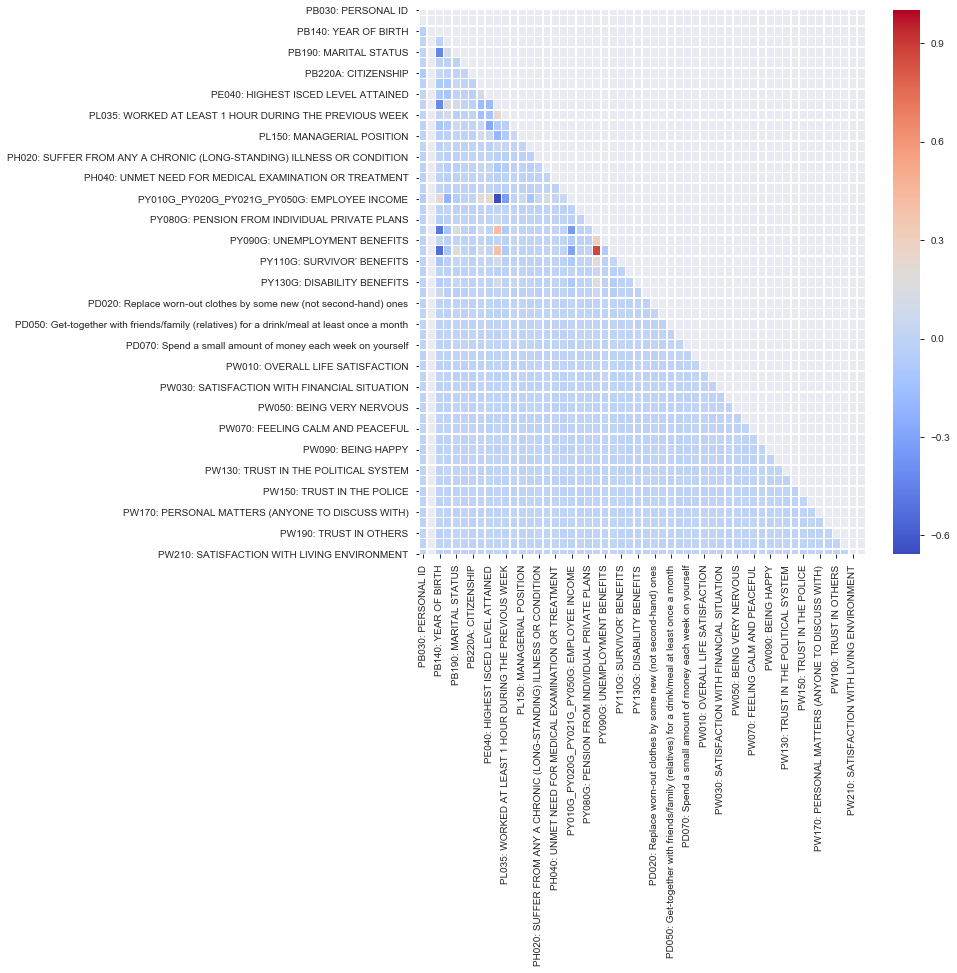

In [12]:
plt.figure(figsize =(10,10))
corr = ds.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = False, linewidth=0.5, mask=mask)

In [1164]:
"""
Problems?
- income is negative correlated with employment status --> makes sense because unemployed have 0 income
- year of birth is correlated with old-age benefit --> makes sense, only old people get old age benefit
- since old age benefit is the biggest part of social benefit, there is also negative correlation between social benefits and 
- year of birth is correlated with martial status:-)
- social benefits is correlated with "individuals" of social benefits --> ok, because i only want to keep either on or the other -- see next section

Pro:
- 'PW130: TRUST IN THE POLITICAL SYSTEM' is not highly correlated with any of thefeatures, this means that we need a complex model to predict and cant only use one column for that
"""


'\nProblems?\n- income is negative correlated with employment status --> makes sense because unemployed have 0 income\n- year of birth is correlated with old-age benefit --> makes sense, only old people get old age benefit\n- since old age benefit is the biggest part of social benefit, there is also negative correlation between social benefits and \n- year of birth is correlated with martial status:-)\n- social benefits is correlated with "individuals" of social benefits --> ok, because i only want to keep either on or the other -- see next section\n\nPro:\n- \'PW130: TRUST IN THE POLITICAL SYSTEM\' is not highly correlated with any of thefeatures, this means that we need a complex model to predict and cant only use one column for that\n'

# 2.3 subsets

In [23]:
subsets

[['PB030: PERSONAL ID',
  'PB020: COUNTRY',
  'PB010: YEAR OF THE SURVEY',
  'PB140: YEAR OF BIRTH',
  'PB150: SEX',
  'PB190: MARITAL STATUS',
  'PB200: CONSENSUAL UNION',
  'PB220A: CITIZENSHIP'],
 ['PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED'],
 ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
  'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
  'PL051: OCCUPATION (ISCO-08 (COM))',
  'PL150: MANAGERIAL POSITION'],
 ['PH010: GENERAL HEALTH',
  'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
  'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
  'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
  'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT'],
 ['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
  'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
  'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
  'PY090G++: SOCIAL BENEFITS'],
 ['PD020: Replace worn-out clothes by some new (not second-

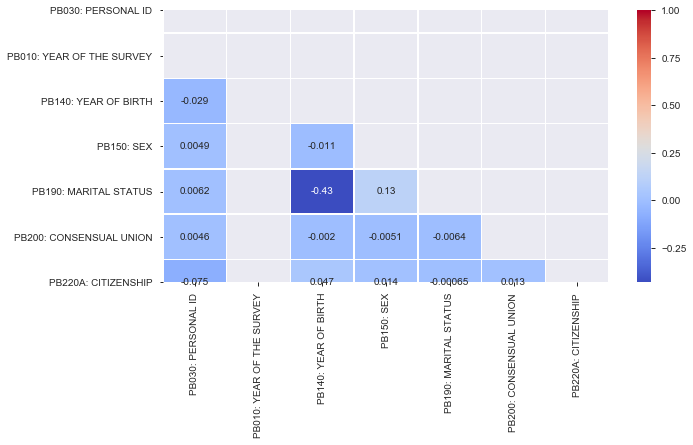

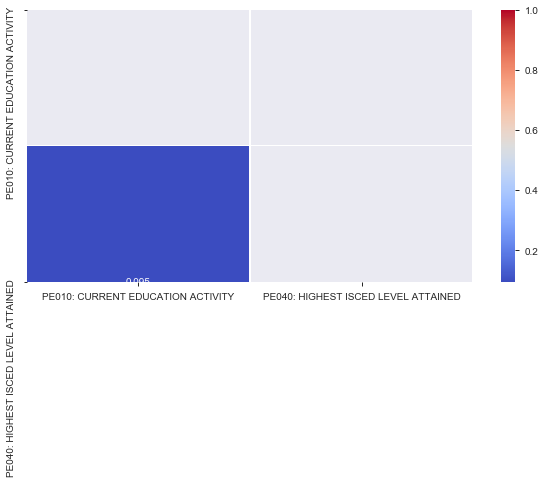

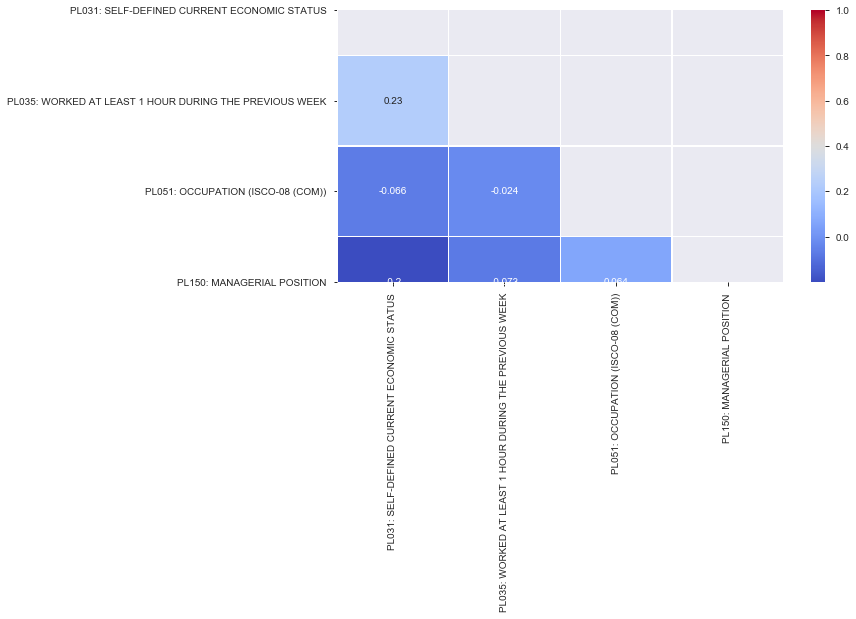

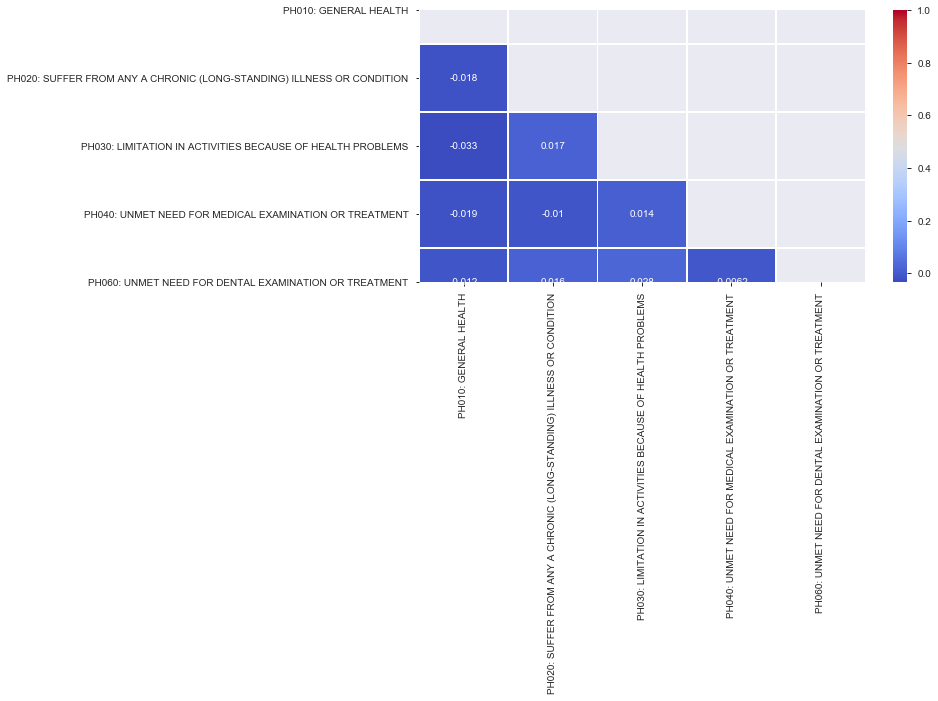

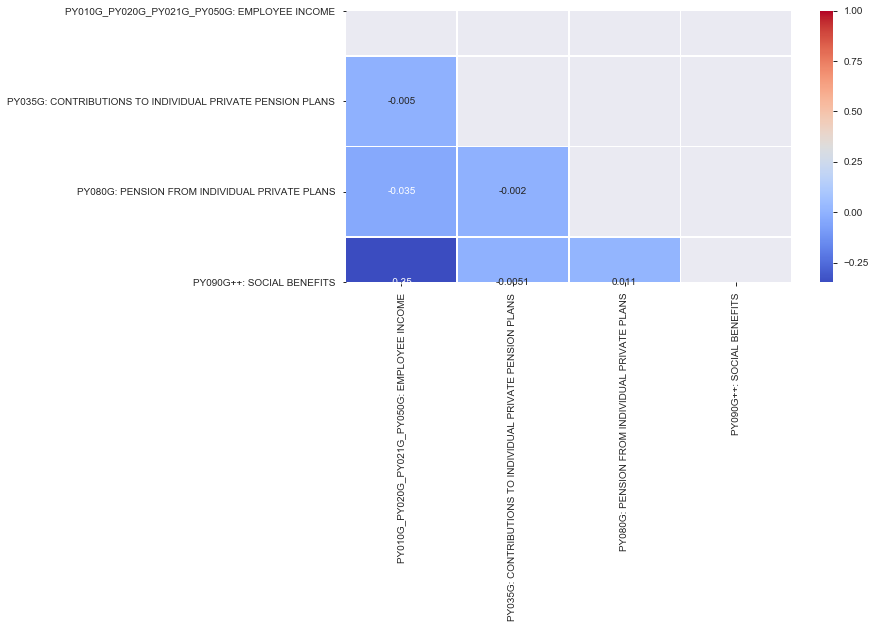

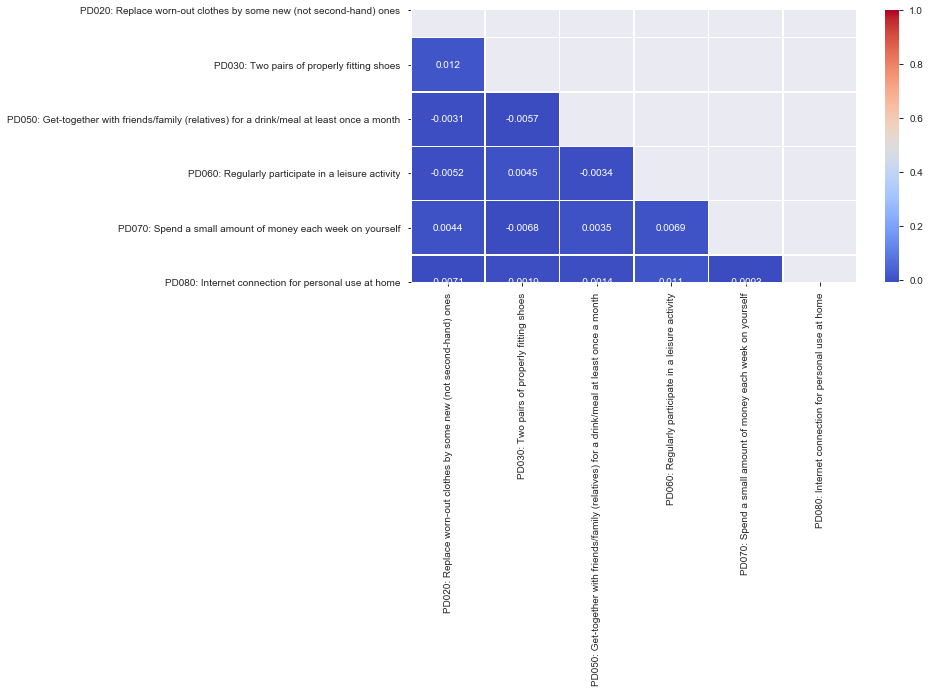

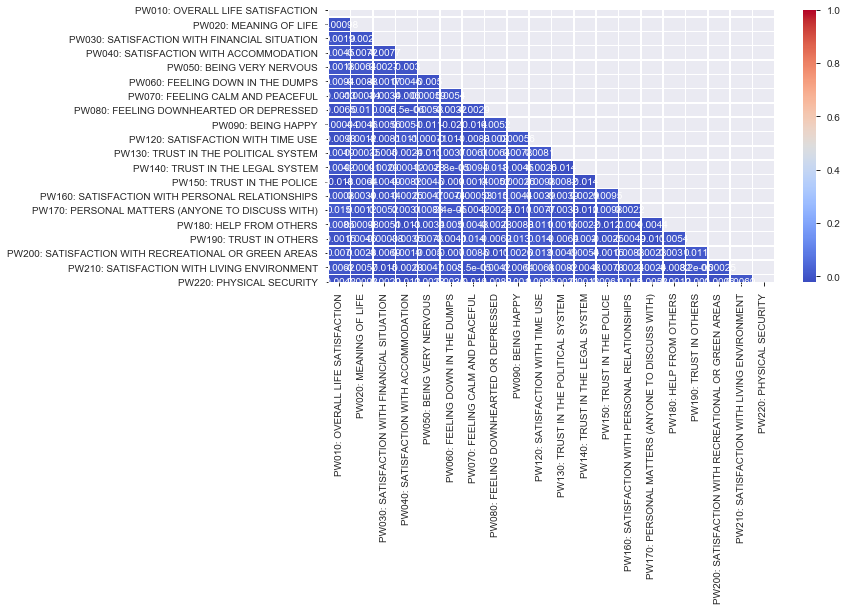

In [27]:
for x in subsets:
    

    plt.figure(figsize =(10,5))
    corr = ds[x].corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    sns.heatmap(corr, cmap='coolwarm', annot = True, linewidth=0.5, mask=mask)
    plt.show()

In [ ]:
## also almost no correlation within the subsets
## --> can get almost impossible to do a ML?